<a href="https://colab.research.google.com/github/bamboohorseking/INDE577/blob/main/Ensemble_learning_and_Random_forest_WSY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble learning 
## Definition:
Ensemble models combine several models to improve the overall performance. Usually, the weak learners were combined to boost performance. However, the recent results show that combining several strong approaches can also result in a better performance. 





<img src="https://ohdsi.github.io/PatientLevelPrediction/articles/ensemble.png">

The goal of ensemble methods is to combine the predictions of several base estimators which build with a given learning algorithm resulting in developing generzlizability and robustness. 

Two families of ensemble methods are distinguished by:
* Averaging methods: build several estimators independently and then average their predictions. Usually, the combined estimator has better performance than any of the single base estimator due to the reduction of variance. 

* Boosting methods: base estimators are built sequentially. The goal is to combine several weak models to produce a powerful ensemble. 


## Data
In this assignment, we will explore Ensemble Learning and Random Forest algorithm on a dataset named "Red wine". It contains 1599 samples,12 columns. Download link is: [link](https://archive.ics.uci.edu/ml/datasets/wine+quality)
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* quality

## Packages
The following packages will be needed to run the code below:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   plotly.express: [documentation](https://plotly.com/python/plotly-express/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)


## Data Preprocessing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline 

In [14]:
wine = pd.read_csv('winequality-red.csv',
                 sep=';',
                 error_bad_lines=False,
                 engine='python')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Visualization 
We set residual sugar and alcohol as X data and quality 5 and 6 as y. Then plot the scatter plot.   

Text(0, 0.5, 'alcohol')

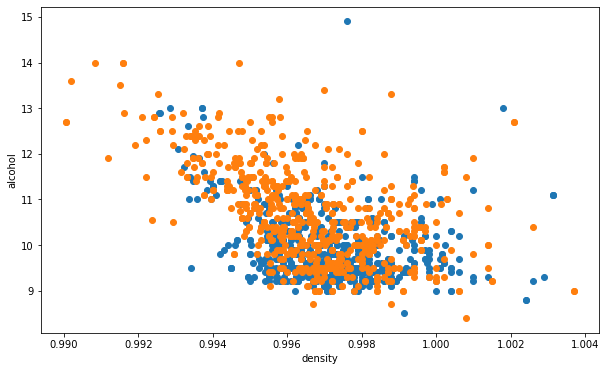

In [15]:
X = wine[['density', 'alcohol']].to_numpy()
y = wine["quality"].to_numpy()
plt.figure(figsize=(10,6))
plt.scatter(X[y==5][:,0],X[y==5][:,1])
plt.scatter(X[y==6][:,0],X[y==6][:,1])
plt.xlabel('density')
plt.ylabel('alcohol')

# Random Forest
## Definition: 
Random forest is a consensus algorithm used in supervised machine learning (ML) to solve regression and classification problems. Each random forest is comprised of multiple decision trees that work together as an ensemble to produce one prediction. 



In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state=42)

In [17]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.590625

We split the dataset into training set and testing set. 

Here we combine logistic regression, MLP and random forest.

In [18]:
log_clf=LogisticRegression()
mlp_clf=MLPClassifier()
rand_clf=RandomForestClassifier()

voting_clf=VotingClassifier([('lr',log_clf),
                            ('mlp',mlp_clf),
                            ('rf',rand_clf)],voting="hard")

In [19]:
import warnings
warnings.filterwarnings('ignore')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

In [20]:
for clf in [log_clf,mlp_clf,rand_clf,voting_clf]:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f'{clf.__class__.__name__},accuracy score={accuracy_score(y_test,y_pred)}')

LogisticRegression,accuracy score=0.540625
MLPClassifier,accuracy score=0.553125
RandomForestClassifier,accuracy score=0.596875
VotingClassifier,accuracy score=0.5375


Unfortunately, the voting classifier has the highest accuracy score. MLP classifier has the lowest accuracy score. 

# Bagging
## Definition:
Bagging also known as bootstrop aggregation. It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model.In bagging, we select the random sample from training dataset without replacement. 

Advantages of bagging:
* Minimizes the overfitting of data
* It improves the model's accuracy
* Deal with higher dimensional data efficiently. 




<img src=https://www.simplilearn.com/ice9/free_resources_article_thumb/Bagging.PNG>

We use baggingclassifier by following code:

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf=BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=500,
                         max_samples=100,
                         bootstrap=True,
                         n_jobs=-1)

In [22]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [23]:
y_pred=bag_clf.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred)

0.565625

The accuracy score of bagging is 0.566 which smaller than MLP classifier 0.553. Thus, MLP classifier method has the lowest accuracy score compared to other methods, but the difference between those methods are not very large. 